<a href="https://colab.research.google.com/github/RanxduG/Machine-Learning-Coursework/blob/main/ML_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

In [1]:
import pandas as pd

# Load the dataset
url_train = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
url_test = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']

df_train = pd.read_csv(url_train, names=column_names)
df_test = pd.read_csv(url_test, names=column_names)

# Concatenate train and test datasets
df = pd.concat([df_train, df_test], ignore_index=True)

print("Dataset Description:")
print(df.info())
print("\nSample records:")
print(df.head())

Dataset Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48843 non-null  object 
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   marital-status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  48842 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(5), object(10)
memory usage: 5.6+ MB
None

Sample records:
  age          workclass    fn

In [2]:
# Assuming 'preprocessed_df' is your DataFrame
nan_sum_per_column = df.isna().sum()

print("Sum of NaN values in each column:")
print(nan_sum_per_column)


Sum of NaN values in each column:
age               0
workclass         1
fnlwgt            1
education         1
education-num     1
marital-status    1
occupation        1
relationship      1
race              1
sex               1
capital-gain      1
capital-loss      1
hours-per-week    1
native-country    1
income            1
dtype: int64


In [3]:
df.shape

(48843, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


#Data Cleaning

In [5]:
df = df.dropna()
df['age'] = df['age'].astype(int)

<ipython-input-5-e9d7cdf1b22e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)


In [6]:
df.shape

(48842, 15)

In [7]:
# Count '?' occurrences in each column
question_mark_counts = (df == ' ?').sum()

# Filter out columns with at least one '?'
columns_with_question_mark = question_mark_counts[question_mark_counts > 0]

print("Columns with '?' values and their counts:")
print(columns_with_question_mark)


Columns with '?' values and their counts:
workclass         2799
occupation        2809
native-country     857
dtype: int64


In [8]:
# Remove rows with '?' values
df = df[~df.isin([' ?']).any(axis=1)]

# Reset index
df.reset_index(drop=True, inplace=True)

print(df.head())



   age          workclass    fnlwgt   education  education-num  \
0   39          State-gov   77516.0   Bachelors           13.0   
1   50   Self-emp-not-inc   83311.0   Bachelors           13.0   
2   38            Private  215646.0     HS-grad            9.0   
3   53            Private  234721.0        11th            7.0   
4   28            Private  338409.0   Bachelors           13.0   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0        2174.0           0.0            40.0   United-S

In [9]:
df.shape

(45222, 15)

In [10]:
# Count '?' occurrences in each column
question_mark_counts = (df == ' ?').sum()

# Filter out columns with at least one '?'
columns_with_question_mark = question_mark_counts[question_mark_counts > 0]

print("Columns with '?' values and their counts:")
print(columns_with_question_mark)

Columns with '?' values and their counts:
Series([], dtype: int64)


In [11]:
df['income'] = df['income'].map({' <=50K': '<=50K',
                                 ' <=50K.': '<=50K',
                                 ' >50K': '>50K',
                                 ' >50K.': '>50K'})

<ipython-input-11-882040e6033a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].map({' <=50K': '<=50K',


In [12]:
valeus_in_workclass = df['workclass'].value_counts()
valeus_in_workclass

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

In [13]:
valeus_in_workclass = df['occupation'].value_counts()
valeus_in_workclass

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

#Data Descibing

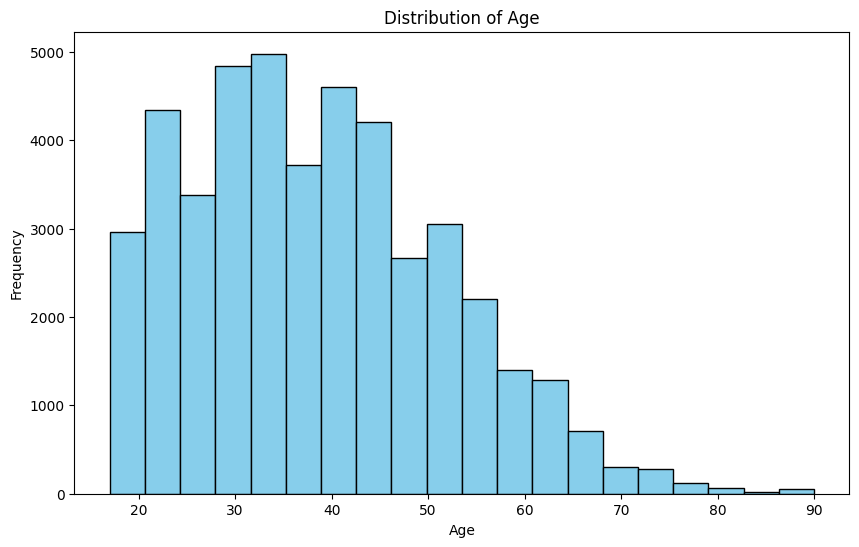

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


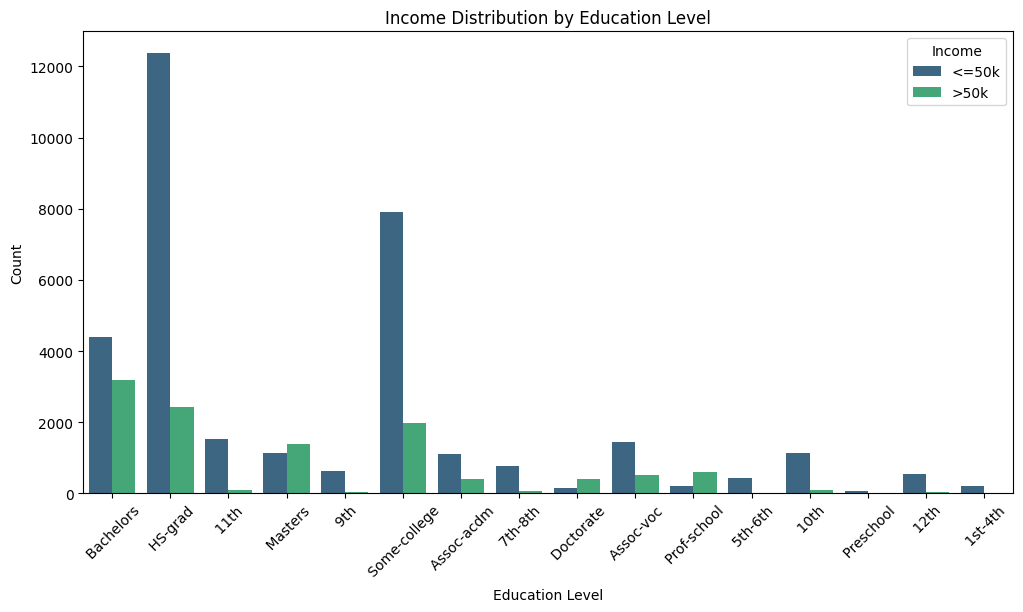

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='income', data=df, palette='viridis')
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Income', labels=['<=50k', '>50k'])
plt.xticks(rotation=45)
plt.show()



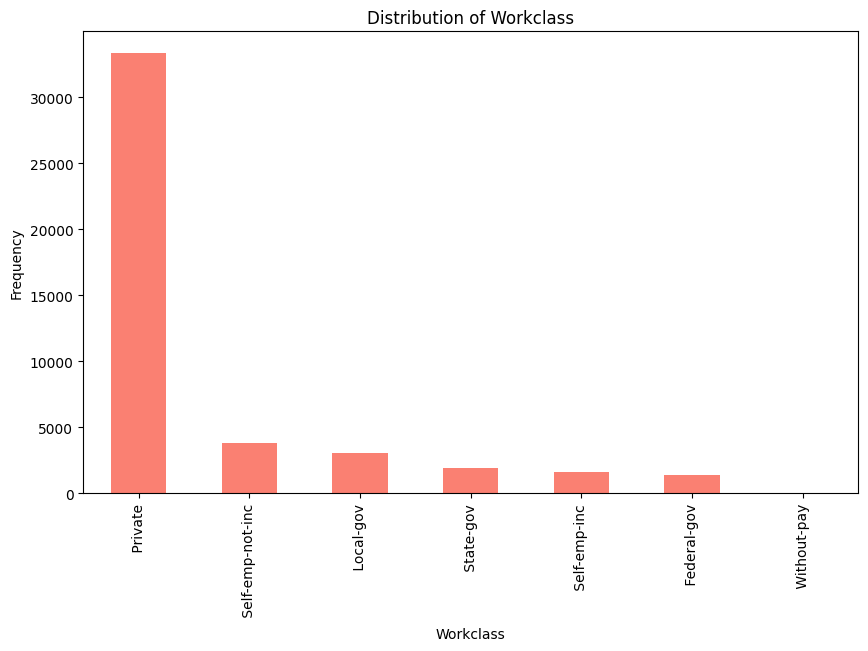

In [16]:
plt.figure(figsize=(10, 6))
df['workclass'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Frequency')
plt.show()


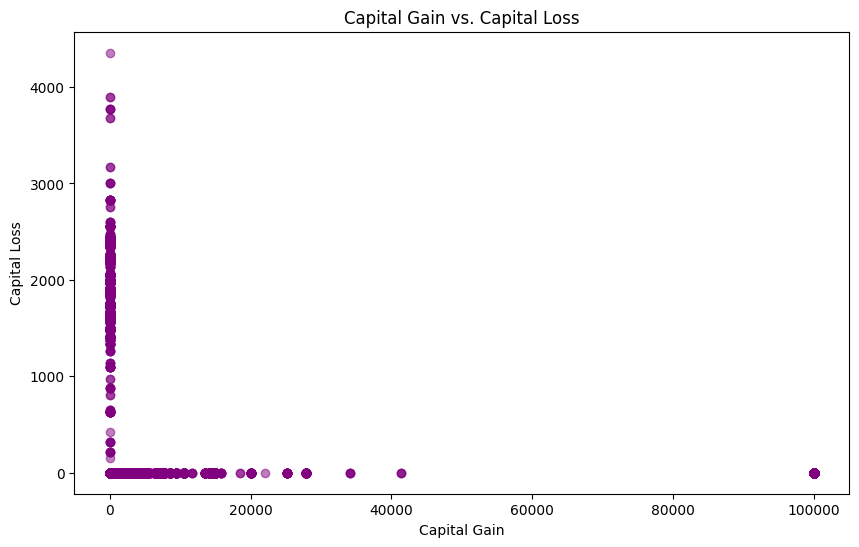

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['capital-gain'], df['capital-loss'], alpha=0.5, color='purple')
plt.title('Capital Gain vs. Capital Loss')
plt.xlabel('Capital Gain')
plt.ylabel('Capital Loss')
plt.show()

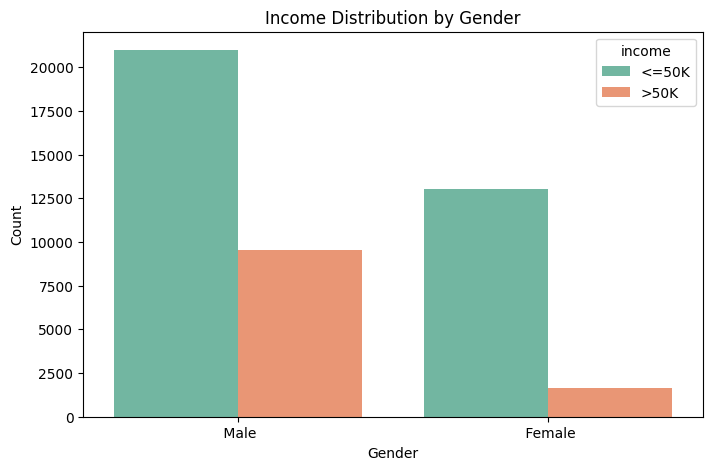

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='income', data=df, palette='Set2')
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


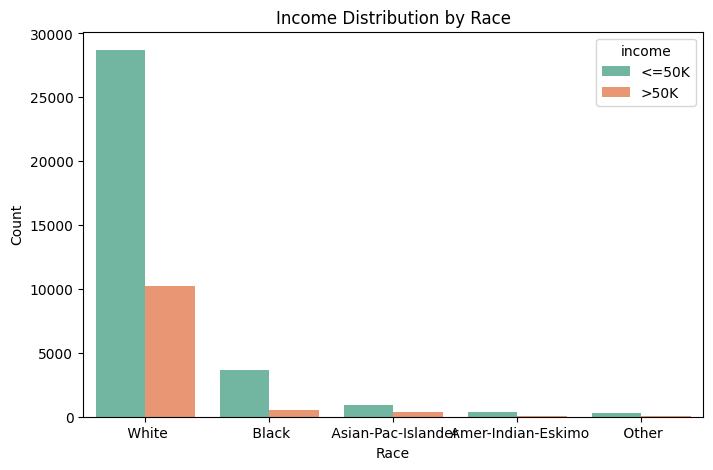

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='race', hue='income', data=df, palette='Set2')
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


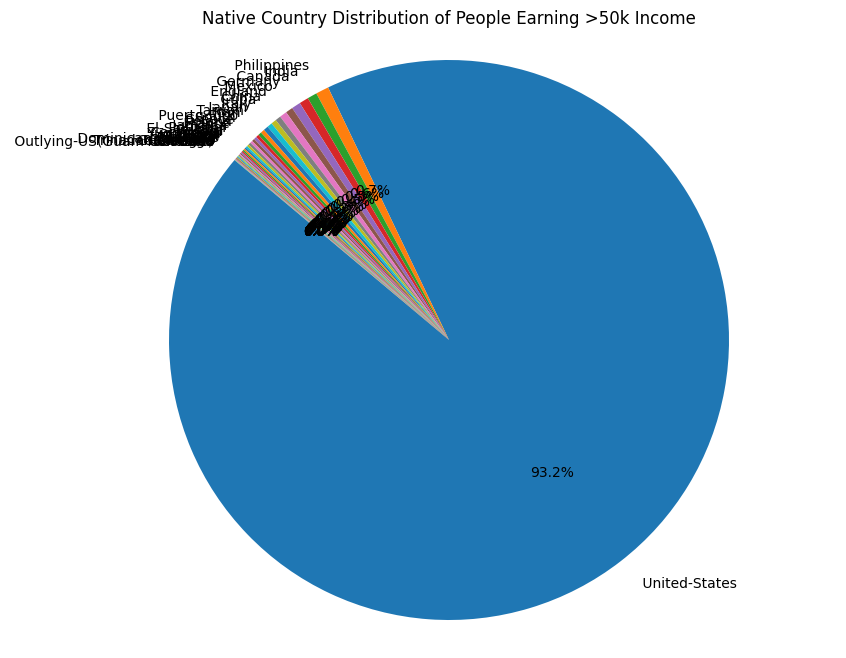

In [21]:
import matplotlib.pyplot as plt

# Filter the DataFrame for people who earn >50k income
high_income_df = df[df['income'] == '>50K']

# Count the number of occurrences of each native country for people who earn >50k income
country_counts = high_income_df['native-country'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Native Country Distribution of People Earning >50k Income')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#Data Preprocessing

In [22]:
def onehot_encode(df, column, prefix):
    df = df.copy()

    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)

    return df

In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Copy DataFrame
preprocessed_df = df.copy()

preprocessed_df = preprocessed_df.dropna()
preprocessed_df['age'] = preprocessed_df['age'].astype(int)

occupation_column = preprocessed_df['occupation']
label_encoder.fit(occupation_column)
preprocessed_df['occupation'] = label_encoder.transform(occupation_column)

native_country_column = preprocessed_df['native-country']
label_encoder.fit(native_country_column)
preprocessed_df['native-country'] = label_encoder.transform(native_country_column)


preprocessed_df['income'] = label_encoder.fit_transform(preprocessed_df['income'])
preprocessed_df = preprocessed_df.dropna(subset=['income'])


preprocessed_df = onehot_encode(
    preprocessed_df,
    column='workclass',
    prefix='workclass'
)
preprocessed_df = onehot_encode(
    preprocessed_df,
    column='marital-status',
    prefix='marital-status'
)
preprocessed_df = onehot_encode(
    preprocessed_df,
    column='relationship',
    prefix='relationship'
)
preprocessed_df = onehot_encode(
    preprocessed_df,
    column='race',
    prefix='race'
)
preprocessed_df = onehot_encode(
    preprocessed_df,
    column='sex',
    prefix='sex'
)


preprocessed_df.drop('education', axis=1, inplace=True)
preprocessed_df.dropna(inplace = True)

# Separate features and target variable
x = preprocessed_df.drop('income', axis=1)
y = preprocessed_df['income'].copy()
print(x.shape)
print(y.shape)


(45222, 35)
(45222,)


<ipython-input-36-0ebda78de661>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_correlation.values, y=income_correlation.index, palette='viridis')


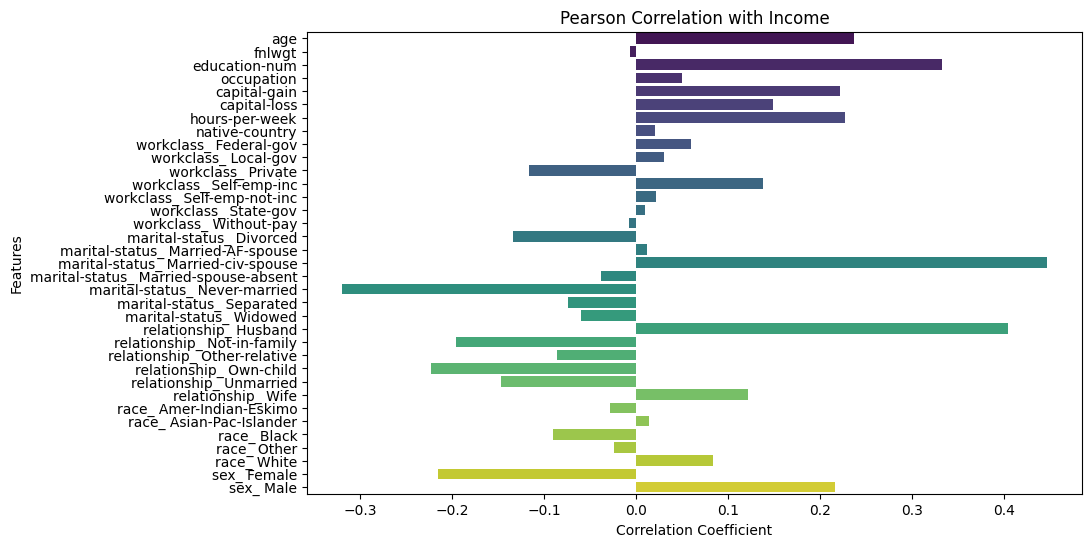

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = preprocessed_df.corr()

# Select correlation with the income_num variable
income_correlation = correlation_matrix['income'].drop('income')

# Plotting the correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=income_correlation.values, y=income_correlation.index, palette='viridis')
plt.title('Pearson Correlation with Income')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [25]:
x = x.drop('fnlwgt', axis=1)

In [26]:
print("Unique values in income_num:", preprocessed_df['income'].unique())

Unique values in income_num: [0 1]


In [27]:
# Identify columns with string values
string_columns = preprocessed_df.select_dtypes(include=['object']).columns

print("Columns with string values:")
print(string_columns)

Columns with string values:
Index([], dtype='object')


#Train-Test Split

In [28]:
# Splitting the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Printing the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36177, 34)
X_test shape: (9045, 34)
y_train shape: (36177,)
y_test shape: (9045,)


In [29]:
class_counts = y_train.value_counts()

print("Class counts in y_train:")
print(class_counts)

Class counts in y_train:
0    27269
1     8908
Name: income, dtype: int64


##Imbalanced Learning

In [30]:
from imblearn.combine import SMOTEENN

# Define the SMOTEENN sampling strategy
smoteenn = SMOTEENN(random_state=42)

# Apply SMOTEENN to the training data
x_train_resampled, y_train_resampled = smoteenn.fit_resample(x_train, y_train)


In [31]:
x_train_resampled.shape

(40224, 34)

In [32]:
y_train_resampled.shape

(40224,)

In [29]:
class_counts = y_train_resampled.value_counts()

print("Class counts in y_train:")
print(class_counts)

Class counts in y_train:
1    21272
0    18952
Name: income, dtype: int64


#Model Training

##Hyperparameter tuning

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Use accuracy as the metric
                           n_jobs=-1)  # Use all available CPU cores

# Perform hyperparameter tuning
grid_search.fit(x_train_resampled, y_train_resampled)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_random_forest = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


##Model Training

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Train Naïve Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train_resampled, y_train_resampled)

# Train Random Forest Classification model
random_forest = RandomForestClassifier(max_depth= None , min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150, random_state=123)
random_forest.fit(x_train_resampled, y_train_resampled)


RandomForestClassifier(n_estimators=150, random_state=123)

##Traning Accuracy

In [35]:
from sklearn.metrics import classification_report

x = random_forest.predict(x_train)
print(classification_report(y_train, x))


              precision    recall  f1-score   support

           0       0.96      0.86      0.91     27269
           1       0.68      0.90      0.77      8908

    accuracy                           0.87     36177
   macro avg       0.82      0.88      0.84     36177
weighted avg       0.89      0.87      0.88     36177



##Model Testing

In [33]:

# Predict on the test set for Naïve Bayes
y_pred_nb = naive_bayes.predict(x_test)
print("\nNaïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Predict on the test set for Random Forest
y_pred_rf = random_forest.predict(x_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.83      6745
           1       0.53      0.84      0.65      2300

    accuracy                           0.77      9045
   macro avg       0.73      0.79      0.74      9045
weighted avg       0.83      0.77      0.78      9045


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      6745
           1       0.63      0.81      0.71      2300

    accuracy                           0.83      9045
   macro avg       0.78      0.82      0.80      9045
weighted avg       0.85      0.83      0.84      9045



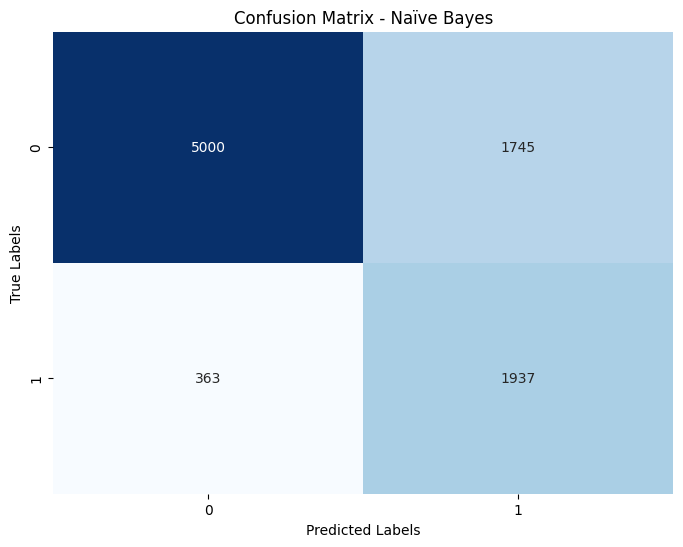

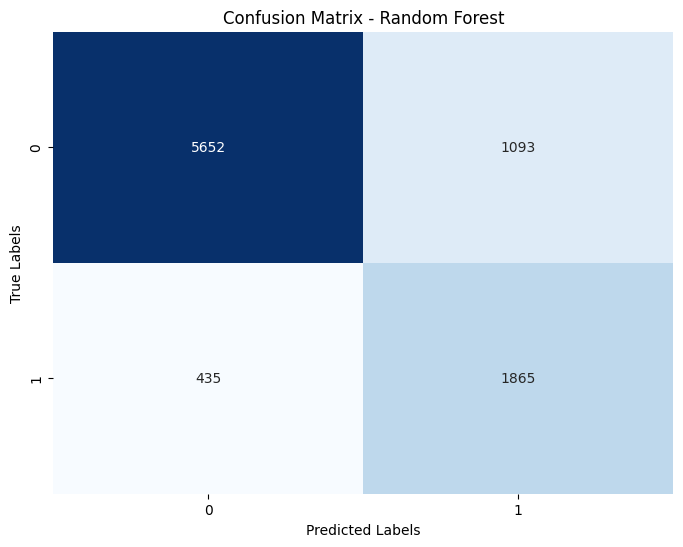

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for Naïve Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix for Naïve Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Naïve Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


##Testing MNB

In [35]:
from sklearn.naive_bayes import MultinomialNB


# Initialize the MNB model
mnb = MultinomialNB()

# Train the model
mnb.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = mnb.predict(x_test)


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      6745
           1       0.66      0.23      0.34      2300

    accuracy                           0.77      9045
   macro avg       0.72      0.59      0.60      9045
weighted avg       0.75      0.77      0.73      9045

